#Aplicação de morfologia na filtragem de ruído
- Autor: Iago Magalhães
- Matrícula: 559973
- Disciplina: Processamento Digital de Imagens

##Importações

In [ ]:
import cv2
import pylab
import numpy as np
import skimage.io
import skimage.data
import skimage.morphology
import skimage.data as data
import matplotlib.pyplot as plt

##Funções

###Transformada de Fourier 2D

In [ ]:
def transformada(image):
  f_transform = np.fft.fft2(image)
  f_transform_shift = np.fft.fftshift(f_transform)

  return f_transform_shift

###Filtro Passa baixa

In [ ]:
def passaBaixa(image, f_transform_shift):
  rows, cols = image.shape
  crow, ccol = rows // 2 , cols // 2
  radius = 30
  mask = np.ones((rows, cols), np.uint8)
  center = [crow, ccol]
  x, y = np.ogrid[:rows, :cols]
  mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2
  mask[mask_area] = 0

  # Aplicar o filtro passa-baixa
  f_transform_shift_filtered = f_transform_shift * mask

  # Transformar de volta para o domínio espacial
  filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_shift_filtered)).real

  return f_transform_shift_filtered, filtered_image

###Filtro Passa faixa

In [ ]:
def passaFaixa(image, f_transform_shift):
  rows, cols = image.shape
  crow, ccol = rows // 2 , cols // 2
  width, height = 30, 30  # Largura e altura da faixa de frequência
  mask = np.zeros((rows, cols), np.uint8)
  center = [crow, ccol]
  x, y = np.ogrid[:rows, :cols]
  mask_area = np.logical_and(
      np.logical_and(center[0]-width//2 < x, x < center[0]+width//2),
      np.logical_and(center[1]-height//2 < y, y < center[1]+height//2)
  )
  mask[mask_area] = 1

  # Aplicar o filtro passa-faixa
  f_transform_shift_filtered = f_transform_shift * mask

  # Transformar de volta para o domínio espacial
  filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_shift_filtered)).real

  return f_transform_shift_filtered, filtered_image

###Filtro Passa alta

In [ ]:
def passaAlta(image, radius, f_transform_shift):
  rows, cols = image.shape
  crow, ccol = rows // 2 , cols // 2
  mask = np.zeros((rows, cols), np.uint8)
  center = [crow, ccol]
  x, y = np.ogrid[:rows, :cols]
  mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2
  mask[mask_area] = 1

  f_transform_shift_filtered = f_transform_shift * mask

  filtered_image = np.fft.ifft2(np.fft.ifftshift(f_transform_shift_filtered)).real

  return f_transform_shift_filtered, filtered_image

###Plotagem das imagens

In [ ]:
def plotImages(image, f_transform_shift, filtered_image):
  plt.figure(figsize=(10,3))
  plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Imagem Original')
  plt.subplot(132), plt.imshow(filtered_image, cmap='gray'), plt.title('Imagem Filtrada')
  plt.subplot(133), plt.imshow(np.log(np.abs(f_transform_shift) + 1), cmap='gray'), plt.title('Transformada de Fourier')
  plt.show()

##Filtro Passa baixa

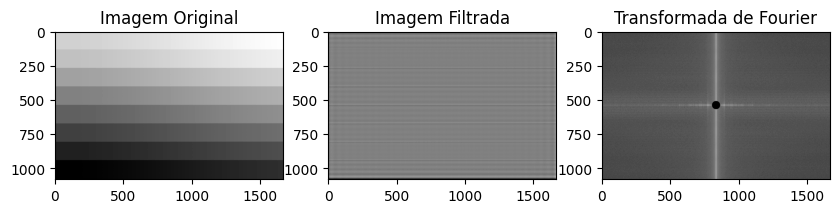

In [ ]:
image = cv2.imread('grays.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

f_transform_shift = transformada(image)

f_transform_shift_filtered, filtered_image = passaBaixa(image, f_transform_shift)

plotImages(image, f_transform_shift_filtered, filtered_image)

##Filtro Passa faixa

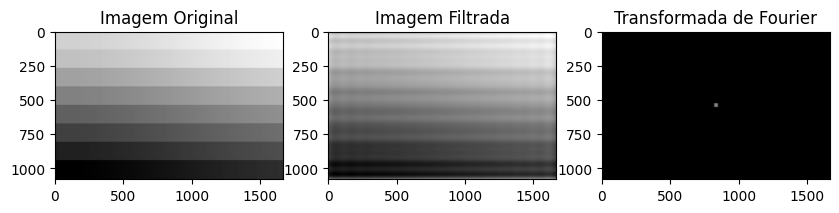

In [ ]:
image = cv2.imread('grays.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

f_transform_shift = transformada(image)

f_transform_shift_filtered, filtered_image = passaFaixa(image, f_transform_shift)

plotImages(image, f_transform_shift_filtered, filtered_image)

##Filtro Passa alta

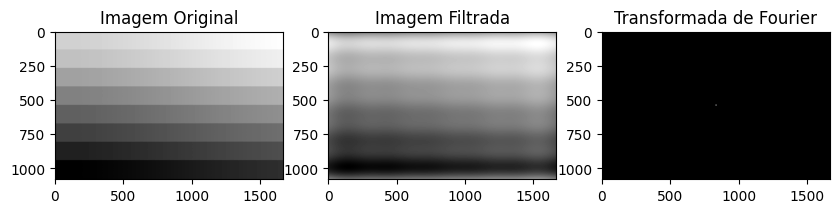

In [ ]:
image = cv2.imread('grays.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

f_transform_shift = transformada(image)

f_transform_shift_filtered, filtered_image = passaAlta(image, 5, f_transform_shift)

plotImages(image, f_transform_shift_filtered, filtered_image)